In [ ]:
!pip install mglearn
import mglearn
import sklearn
sklearn.__version__

     |████████████████████████████████| 540 kB 4.9 MB/s 
  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582638 sha256=ea4a765aa3437ca99440a33a1d26ff3d99c5aad41fc9bb7705bd7c265f74192e
  Stored in directory: /root/.cache/pip/wheels/f1/17/e1/1720d6dcd70187b6b6c3750cb3508798f2b1d57c9d3214b08b
Successfully built mglearn


'0.22.2.post1'

# 지도학습 - 규제선형모델 (Ridge_Lasso_Regression)


Linear Regression의 문제

- 단순 선형회귀 : 단 하나의 특성(feature)을 가지고 라벨값(label) 또는 타깃(target)을 예측하기 위한
회귀 모델을 찾는 것
- 다중 선형회귀 : 여러 개의 특성을 활용해서 회귀모델을 찾는 것 (다변수 선형 회귀)




다중 선형 회귀 모델은 과대적합(overfitting) 될 때가 종종 발생

주어진 샘플들의 특성값들과 라벨값의 관계를 필요이상으로 너무 자세하게 복잡하게 분석했다는 것
- 새로운 데이터가 주어졌을 때 제대로 예측해내기가 어려움 (일반화 능력이 떨어짐)
- Ridge / Lasso / Elastic Regression 등장

Bias(편향) 오차와 Variance(분산) 오차

특성이 증가하면 복잡성이 증가 -> variance는 증가, bias는 감소 -> Overfitting 발생

<center>
 <img src="https://t1.daumcdn.net/cfile/tistory/99CDCC33599AC28F07" alt="편향과 분산" width="40%" />

 Bias(편향) 오차와 Variance(분산) 오차를 표현

</center>

- bias 감소가 variance의 증가와 같아지는 최적의 point를 찾아야 함
- Overfitting 문제 해결 : 데이터의 복잡도 줄이기, 정규화를 통한 분산 감소

<center>
 <img src="https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=http%3A%2F%2Fcfile9.uf.tistory.com%2Fimage%2F996DB433599AC34225B9BD" alt="모델 복잡도" width="40%" />

 모델 복잡도

</center>





|구분| 모델 복잡도| 적합성|
|---|---|---|
|Bias 오차가 낮은 & Variance 오차가 높은|복잡| 과대적합(over fitting)|
 |Bias 오차가 높은 Variance 오차가 낮은| 단순| 과소적합(under fitting)|

* Bias(편향) 에러가 높아지는 것은  많은 데이터를 고려하지 않아 (=모델이 너무 단순)  정확한 예측을 하지 못하는 경우

* Variance(분산) 에러는 노이즈까지 전부 학습하여 (=모델이 너무 복잡) 약간의 input에도 예측 Y 값이 크게 흔들리는 것

이 두가지 에러가 상호 Trade-off 관계에 있어서 이 둘을 모두 잡는 것은 불가능 한 딜레마가 발생

정규화(Regularization, 규제)

- 과대적합이 되지 않도록 모델을 강제로 제한하는 것을 의미.
- 가중치(w)의 값을 조정하여 제약을 주는 것.

- L1 규제 : Lasso
  - <font  color=yellow>w의 모든 원소에 똑같은 힘으로 규제를 적용하는 방법. 특정 계수들은 0이 됨.      = 필요없는 특성은 0 으로 사라지게됨
  - 특성선택(Feature Selection)이 자동으로 이루어진다.</font>

- L2 규제 : Ridge
  - <font  color=yellow>w의 모든 원소에 골고루 규제를 적용하여 0에 가깝게 만든다.</font> -> 0 에 가깝게 골고루 규제가 됨


## Ridge Regression

평균제곱오차식에 alpha 항이 추가
- alpha 값을 크게 하면 패널티 효과가 커지고(가중치 감소),
- alpha 값을 작게 하면 그 반대가 된다.

- 기존 선형회귀에서는 적절한 가중치와 편향을 찾아내는 것이 관건
- 추가적인 제약 조건(규제항)을 포함 – 가중치에 대한 제곱의 합을 사용
- <font  color=yellow>MSE가 최소가 되게 하는 가중치(w)와 편향(b)을 찾는</font> 동시에 <font  color=yellow> MSE와 규제항의 합이 최소</font>가 되어야 함 -> 가중치 W의 모든 원소가 0이 되거나 0에 근사하도록 -> <font  color=yellow>학습한 가중치 (W)의 제곱을 규제항 (L2 규제)</font>으로 사용

> \\( cost(W,b)\\ =MSE+규제항\\ =MSE+\alpha \cdot { L }_{ 2 }norm\\ =\cfrac { 1 }{ m } \sum\limits _{ i=1 }^{ m }{ (H({ x }^{ (i) })-{ y }^{ (i) }) } ^{ 2 }+\alpha \sum\limits _{ j=1 }^{ n }{ { w }_{ j }^{ 2 } } \\ (n : 가중치의 개수, α : 규제의 정도) \\)
합칠때 값이 적게 나오는게 베스트 이다.
완전 0 은 안돼고 0에 가까운 숫자 들이 나온다.
> MSE에 의한 Overfitting을 줄이기 위해 α를 크게 함 -> 정확도 감소 -> α가 너무 크면 MSE의 비중이 작아져서 과소적합 가능성 증가

- α가 증가하면 bias는 증가하고 variance는 감소하며 α가 0이 되면 MSE와 동일하게 되어 선형 회귀모델이 됨 -> Ridge 모델은 <font  color=yellow>bias을 약간 손해보면서 variance를 크게 줄여</font> 성능의 향상
- 단점 : <font  color=yellow>몇몇 변수가 중요하더라도 모든 변수에 대해 적합을 해야 하고 완벽한 0은 나오지 않음</font> -> 예측의 문제가 아니라 해석의 문제

Ridge()
```
Ridge(alpha, fit_intercept, normalize, copy_X, max_iter, tol, solver, random_state)
```

- alpha : 값이 클수록 강력한 정규화(규제) 설정하여 분산을 줄임, 양수로 설정(중요)
- fit_intercept : 모형에 상수항 (절편)이 있는가 없는가를 결정하는 인수 (default : True)
- normalize : 매개변수 무시 여부
- copy_X : X의 복사 여부
- max_iter : 계산에 사용할 작업 수 (정밀도를 올리기 위해 epoch 라고 생각하면됨)
- tol : 정밀도
- solver : 계산에 사용할 알고리즘 (auto, svd, cholesky, lsqr, sparse_cg, sag, saga)
- random_state : 난수 seed 설정


#### Ridge_Lasso_Regression 실습 01

확장 보스턴 집값 셋에 선형회귀 적용

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
%matplotlib inline

In [ ]:
# 확장 보스턴 집값
import mglearn
from sklearn.model_selection import train_test_split
x,y = mglearn.datasets.load_extended_boston()
train_x,test_x,train_y,test_y = train_test_split(x,y,random_state = 0)
train_x.shape

(379, 104)

In [ ]:
model = LinearRegression()
model.fit(train_x,train_y)

model.score(train_x,train_y),model.score(test_x,test_y)



(0.9520519609032727, 0.607472195966557)

확장 보스턴 집값 셋에 릿지회귀 적용

In [ ]:
# model_ridge
model_ridge = Ridge().fit(train_x,train_y)
model_ridge.score(train_x,train_y) , model_ridge.score(test_x,test_y)

(0.8857966585170941, 0.7527683481744751)

In [ ]:
model_ridge_10 = Ridge(alpha = 10).fit(train_x,train_y) #분산이 커져 값을 줄임
model_ridge_10.score(train_x,train_y) , model_ridge_10.score(test_x,test_y)

(0.7882787115369614, 0.6359411489177309)

In [ ]:
model_ridge_01= Ridge(alpha = 0.1).fit(train_x,train_y) #alpha 값이 높아지면 분산이 높아짐 
model_ridge_01.score(train_x,train_y) , model_ridge_01.score(test_x,test_y)

(0.9282273685001992, 0.7722067936479818)

(-250.0, 250.0)

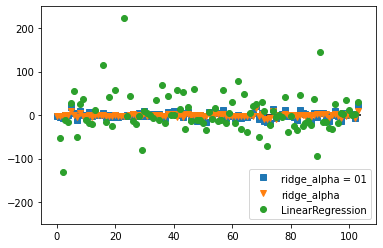

In [ ]:
##plt.plot(model_ridge_10.coef_,'^',label = 'ridge_alpha = 10') #alpha 값이 커질수록 분산이 작아진다 데이터 가 잘모인다.
plt.plot(model_ridge_01.coef_,'s',label = 'ridge_alpha = 01')
plt.plot(model_ridge.coef_,'v',label = 'ridge_alpha')
plt.plot(model.coef_,'o',Label = 'LinearRegression')
plt.legend()
plt.hlines(0,0,len(model.coef_))
plt.ylim(-250,250)

## Lasso Regression

- 릿지 회귀의 단점을 해결하기 위해 대안으로 나온 방법
학습한 가중치의 절대값을 규제항(L1 규제)으로 사용 – 가중치의 절대값의 합을 사용
- 학습한 가중치의 절대값을 규제항(L1 규제)으로 사용 – 가중치의 절대값의 합을 사용 쓰지 않은 값을 0으로 만들어줌

>$$  \begin{align} 
cost(W,b)   \\ 
& =MSE+규제항 \\  
& =MSE+\alpha \cdot { L }_{ 1 }norm \\  
& =\cfrac { 1 }{ m } \sum\limits_{ i=1 }^{ m }{ (H({ x }^{ (i) })-{ y }^{ (i) }) } ^{ 2 }+\alpha \sum\limits_{ j=1 }^{ n }{ \left| { w }_{ j } \right|  }  \\
& (n:가중치의개수,α:규제의정도)  \end{align} $$


- 적당한 α만으로 몇몇 계수를 정확하게 0으로 만들 수 있음 -> 해석을 용이하게 함
- MSE와 규제항의 합이 최소가 되게 하는 파라미터 W와 b를 찾는 것이 Lasso의 목표
- MSE항이 작아질 수록 오차가 작아지고, L1-norm이 작아질 수록 많은 가중치들이 0이 되거나 0에 가까워짐 -> 데이터 전 처리에 주로 사용 (필요 없는 데이터 제거)
- Ridge와 Lasso의 성능 차이는 사용하는 데이터의 상황에 따라 다름 -> 유의미한 변수가 적을 때는 Lasso가 반대의 경우는 Ridge가 더 좋은 성능을 보임.

사용할 특성을 고를수가 있음 

사용해야 될데이터가 많으면 리지가 좋고 
사용할 데이터가 변수가 적을떄는 라쏘 

Lasso()
```
Lasso(alpha, fit_intercept, normalize, precompute, copy_X, max_iter, tol, warm_start, positive, solver, random_state, selection)
```
- alpha : 값이 클수록 강력한 정규화(규제) 설정하여 분산을 줄임, 양수로 설정
- fit_intercept : 모형에 상수항 (절편)이 있는가 없는가를 결정하는 인수 (default : True)
- normalize : 매개변수 무시 여부
- precompute : 계산속도를 높이기 위해 미리 계산된 그램 매트릭스를 사용할 것인지 여부
- copy_X : X의 복사 여부
- max_iter : 계산에 사용할 작업 수
- tol : 정밀도
- warm_start : 이전 모델을 초기화로 적합하게 사용할 것인지 여부
- positive : 계수가 양수로 사용할 것인지 여부
- solver : 계산에 사용할 알고리즘 (auto, svd, cholesky, lsqr, sparse_cg, sag, saga) -> 경사 하강법 알고리즘 
- random_state : 난수 seed 설정
- selection : 계수의 업데이트 방법 설정 (random으로 설정하면 tol이 1e-4보다 높을 때 빠른 수렴)

In [ ]:
from sklearn.linear_model import Lasso

# lasso
model =Lasso().fit(train_x,train_y)
print(model.score(train_x,train_y))
print(model.score(test_x,test_y))
model.coef_ !=0 #특성을 4개만 사용함 -> 과적합이 발생함 
print(np.sum(model.coef_!=0))

0.29323768991114607
0.20937503255272294
4


In [ ]:
model_lasso_01 =Lasso(alpha = 0.1).fit(train_x,train_y)
print(model_lasso_01.score(train_x,train_y))
print(model_lasso_01.score(test_x,test_y))
model.coef_ !=0 #특성을 8개만 사용함 -> 과적합이 발생함 
print(np.sum(model_lasso_01.coef_!=0))

0.7709955157630054
0.6302009976110041
8


In [ ]:
model_lasso_00001=Lasso(alpha = 0.001,max_iter=10000).fit(train_x,train_y)
print(model_lasso_00001.score(train_x,train_y))
print(model_lasso_00001.score(test_x,test_y))
model.coef_ !=0 #특성을 76개만 사용함 -> 과적합이 발생함 
print(np.sum(model_lasso_10.coef_!=0))

0.9392051498735196
0.7382665830958586
0


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 18.558749242628437, tolerance: 3.233182126649076
  positive)


(-50.0, 50.0)

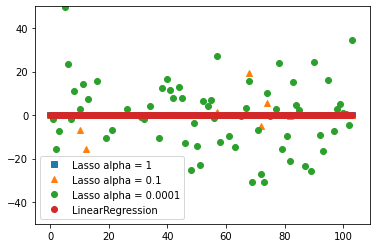

In [ ]:
#시각화 
plt.plot(model.coef_,'s',label = 'Lasso alpha = 1')
plt.plot(model_lasso_01.coef_,'^',label = 'Lasso alpha = 0.1')
plt.plot(model_lasso_00001.coef_,'o',label = 'Lasso alpha = 0.0001')
plt.plot(model.coef_,'o',Label = 'LinearRegression')
plt.legend()
plt.hlines(0,0,len(model.coef_))
plt.ylim(-50,50)

## ElasticNet Regression

- 선형 회귀에 2가지 규제항 (L1 규제항, L2 규제항)을 추가한 것

> \begin{align}
cost(W,b)\\ 
& =MSE+규제항\\
& =MSE+ { \alpha }_{ 1 }\cdot { L }_{ 1 }norm + { \alpha }_{ 2 }\cdot { L }_{ 2 }norm\\
& =\cfrac { 1 }{ m } \sum\limits _{ i=1 }^{ m }{ (H({ x }^{ (i) })-{ y }^{ (i) }) } ^{ 2 } +\alpha _{ 1 }\sum\limits _{ j=1 }^{ n }{ \left| { w }_{ j } \right|  +\alpha _{ 2 }\sum\limits_{ j=1 }^{ n }{ { w }_{ j }^{ 2 } } } \\
& (n:가중치의개수,α:규제의정도) \end{align}

ElasticNet()
```
ElasticNet(alpha, l1_ratio, fit_intercept, normalize, precompute, max_iter, copy_X,
tol, warm_start, positive, random_state, selection)
```
- alpha : 값이 클수록 강력한 정규화(규제) 설정하여 분산을 줄임, 양수로 설정
- l1_ratio : L1 규제의 비율 (혼합비율?)
- fit_intercept : 모형에 상수항 (절편)이 있는가 없는가를 결정하는 인수 (default : True)
- normalize : 매개변수 무시 여부
- precompute : 계산속도를 높이기 위해 미리 계산된 그램 매트릭스를 사용할 것인지 여부
- copy_X : X의 복사 여부
- max_iter : 계산에 사용할 작업 수
- tol : 정밀도
- warm_start : 이전 모델을 초기화로 적합하게 사용할 것인지 여부
- positive : 계수가 양수로 사용할 것인지 여부
- random_state : 난수 seed 설정
- selection : 계수의 업데이트 방법 설정 (random으로 설정하면 tol이 1e-4보다 높을 때 빠른 수렴)

## 다항회귀

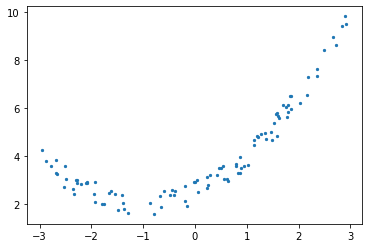

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
#항을 여러개 만들어서 만든다.

n = 100
x = 6 * np.random.rand(n,1) -3
y = 0.5 * x**2 + 1 * x + 2 + np.random.rand(n,1)

plt.scatter(x,y,s = 5)


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2,include_bias=False) #차수가 2 인 특성을 전처리 
# 데이터 변환 과정과 머신러닝을 연결해주는 파이프라인
from sklearn.pipeline import make_pipeline  

x_poly = poly_features.fit_transform(x)
x_poly.shape , x.shape

x_poly #[0] index 값의 제곱이 [1] 에 만들어 진다.


array([[-2.07621279e+00,  4.31065956e+00],
       [-2.30263727e+00,  5.30213839e+00],
       [-1.53661548e+00,  2.36118714e+00],
       [-6.52188770e-01,  4.25350191e-01],
       [ 2.03458574e+00,  4.13953912e+00],
       [ 2.71933755e+00,  7.39479668e+00],
       [-1.93164562e+00,  3.73125481e+00],
       [ 4.91015935e-02,  2.41096648e-03],
       [ 8.74571809e-01,  7.64875850e-01],
       [-6.82173183e-01,  4.65360251e-01],
       [ 1.22079444e+00,  1.49033905e+00],
       [ 1.70993964e+00,  2.92389356e+00],
       [ 1.37221643e+00,  1.88297792e+00],
       [-1.79916875e+00,  3.23700819e+00],
       [ 2.35059872e+00,  5.52531434e+00],
       [-1.48983472e+00,  2.21960749e+00],
       [-1.94092511e+00,  3.76719028e+00],
       [ 2.18481228e+00,  4.77340471e+00],
       [ 1.79775903e+00,  3.23193753e+00],
       [ 2.31601415e-01,  5.36392154e-02],
       [ 1.60095475e+00,  2.56305613e+00],
       [-2.35407585e+00,  5.54167312e+00],
       [-2.67228053e+00,  7.14108323e+00],
       [-1.

In [ ]:
# 다항회귀 그래프
model = LinearRegression()
model.fit(x_poly,y)
model.coef_ , model.intercept_
model.coef_[0][0]
model.coef_[0][1]

model.intercept_[0]

2.57096589769578

In [ ]:
model_li = make_pipeline(poly_features,LinearRegression()) #만들고 싶은 다항 회귀를 만든다 항상 전처리를 하고 학습을 한다 -> 더 좋은거 같은데?
model_li.fit(x,y)
model_li.steps[1][1].coef_,model_li.steps[1][1].intercept_


(array([[1.00308547, 0.49207786]]), array([2.5709659]))

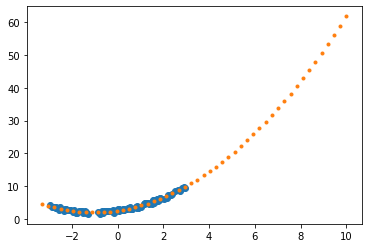

In [ ]:
plt.scatter(x,y)
xx = np.linspace(-3.3,10)
yy = model_li.predict(xx.reshape(-1,1))
plt.scatter(xx,yy,marker = '.')

#### PolynomialFeatures()
```
PolynomialFeatures(degree=2, *, interaction_only=False, include_bias=True)
```

- degree : 차수
- interaction_only: True면 2차항에서 상호작용항만 출력
- include_bias : 상수항 생성 여부


다항 변환

- 입력값  x 를 다항식으로 변환한다.

> \\( x \;\; \rightarrow \;\; [ 1, x, x^2, x^3, \cdots ] \\) <br>
 
> 만약 열의 갯수가 두 개이고 2차 다항식으로 변환하는 경우에는 다음처럼 변환한다.

> \\( [x_1, x_2] \;\; \rightarrow \;\; [ 1, x_1, x_2, x_1^2, x_1x_2, x_2^2 ] \\)  <br>

> 예) <br>
> \\( [x_1=0, x_2=1]  \;\; \rightarrow \;\; [1, 0, 1, 0, 0, 1] \\) <br>

> \\( [x_1=2, x_2=3]  \;\; \rightarrow \;\; [1,2,3,4,6,9] \\)
 


In [ ]:
from sklearn.preprocessing import PolynomialFeatures
x = np.arange(6).reshape(3,2)
x

array([[0, 1],
       [2, 3],
       [4, 5]])

In [ ]:
poly = PolynomialFeatures(degree = 3)
poly.fit_transform(x)

array([[  1.,   0.,   1.,   0.,   0.,   1.,   0.,   0.,   0.,   1.],
       [  1.,   2.,   3.,   4.,   6.,   9.,   8.,  12.,  18.,  27.],
       [  1.,   4.,   5.,  16.,  20.,  25.,  64.,  80., 100., 125.]])

In [ ]:
# 다항차수는 적용하지 않고, 오직 상호작용(교호작용) 효과만을 분석하려면 
# interaction_only=True 옵션을 설정해주면 됩니다. 
# degree를 가지고 교호작용을 몇 개 수준까지 볼지 설정해줄 수 있습니다.

poly = PolynomialFeatures(degree=2 , interaction_only= True)
x_poly = poly.fit_transform(x) #같은 변수 제곱은 빠짐 
print(x_poly)

[[ 1.  0.  1.  0.]
 [ 1.  2.  3.  6.]
 [ 1.  4.  5. 20.]]


## Linear / Ridge / Lasso / ElasticNet Regression의 비교

|구분| 릿지회귀| 라쏘회귀| 엘라스틱넷|
|---|---|---|---|
|제약식| L2 norm| L1 norm| L1+L2 norm|
|변수선택 |불가능| 가능| 가능|
|solution| closed form| 명시해 없음| 명시해 없음|
|장점| 변수간 상관관계가 높아도 좋은 성능| 변수간 상관관계가 높으면 성능↓| 변수간 상관관계를 반영한 정규화|
|특징| 크기가 큰 변수를 우선 적으로 줄임|비중요 변수를 우선적 으로 줄임|상관관계가 큰 변수를 동시에 선택/배제|

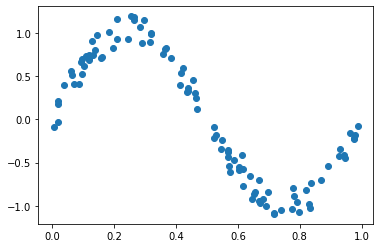

In [ ]:
import seaborn as sns
np.random.seed(0)
n_sample = 100
x = np.sort(np.random.rand(n_sample))
x
y = np.sin(2*np.pi * x) + np.random.randn(n_sample) * 0.1
plt.scatter(x,y)


#x = x[:,np.newaxis] = 이렇게 하면 1차원을 2차원으로 바꿔줄수 있음


In [ ]:
import pandas as pd
df = pd.DataFrame( {'x':x,'y':y})
df.head(3)

,x,y
0,0.004695,-0.087017
1,0.018790,0.207868
2,0.020108,0.172570


In [ ]:

poly = PolynomialFeatures(degree = 9)
model_li = make_pipeline(poly,LinearRegression())
model_li.fit(x.reshape(-1,1),y)
model_li.steps[1][1].coef_

array([ 0.00000000e+00,  2.12796893e+01, -2.72924672e+02,  2.20655583e+03,
       -9.97968866e+03,  2.60149596e+04, -4.06420381e+04,  3.77046431e+04,
       -1.91514173e+04,  4.09881527e+03])

(-2.0, 2.0)

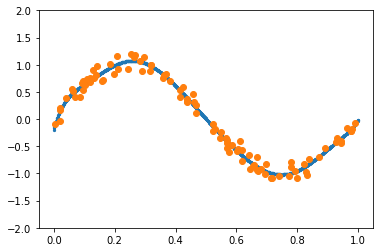

In [ ]:
xx = np.linspace(0,1,1000)
yy = model_li.predict(xx.reshape(-1,1))
plt.scatter(xx,yy,s = 5)
plt.scatter(x,y)
plt.ylim(-2,2)

In [ ]:
#ridge Lasso 
model_ridge = make_pipeline(poly,Ridge(alpha = 0.01))


(-1.5, 1.5)

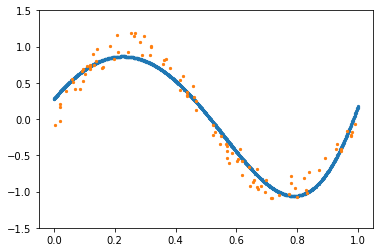

In [ ]:
model_ridge.fit(x.reshape(-1,1),y)
xx = np.linspace(0,1,1000)
yy = model_ridge.predict(xx.reshape(-1,1))
plt.scatter(xx,yy,s = 5)
plt.scatter(x,y,s = 5)
plt.ylim(-1.5,1.5)

In [ ]:
model_Lasso = make_pipeline(poly,Lasso(alpha=0.00001))
model_Lasso.fit(x.reshape(-1,1),y)


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.5103297936471082, tolerance: 0.005128631265225728
  positive)


Pipeline(memory=None,
         steps=[('polynomialfeatures',
                 PolynomialFeatures(degree=9, include_bias=True,
                                    interaction_only=False, order='C')),
                ('lasso',
                 Lasso(alpha=1e-05, copy_X=True, fit_intercept=True,
                       max_iter=1000, normalize=False, positive=False,
                       precompute=False, random_state=None, selection='cyclic',
                       tol=0.0001, warm_start=False))],
         verbose=False)

(-1.5, 1.5)

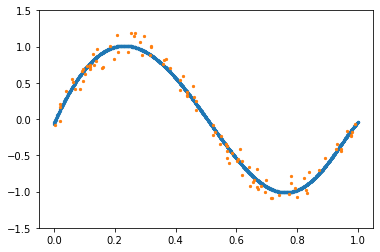

In [ ]:
xx = np.linspace(0,1,1000)
yy = model_Lasso.predict(xx.reshape(-1,1))
plt.scatter(xx,yy,s = 5)
plt.scatter(x,y,s = 5)
plt.ylim(-1.5,1.5)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.6833126146291357, tolerance: 0.005128631265225728
  positive)


(-1.5, 1.5)

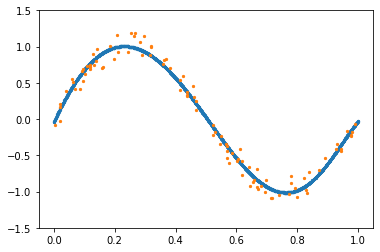

In [ ]:
model_elastic = make_pipeline(poly,ElasticNet(alpha=0.00001,l1_ratio=0.5))
model_elastic.fit(x.reshape(-1,1),y)

xx = np.linspace(0,1,1000)
yy = model_elastic.predict(xx.reshape(-1,1))
plt.scatter(xx,yy,s = 5)
plt.scatter(x,y,s = 5)
plt.ylim(-1.5,1.5)